In [1]:
# 1. Prologue: an atomistic view of electrical resistance <a id="first-chapter"></a>

In [2]:
## 1.1 Energy level diagram  

In [3]:
from pylab import *
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; q=1.602e-19; eps0=8.854e-12; epsr=4; m=0.25*9.11e-31 #Effective mass
I0=q*q/hbar;

#Parameters
W=1e-6; L=10e-9; t=1.5e-9; #W=Width, L=Length of active region, t=oxide thickness
Cg=epsr*eps0*W*L/t; Cs=0.05*Cg; Cd=0.05*Cg; CE=Cg+Cs+Cd; U0=q/CE;
alphag=Cg/CE; alphad=Cd/CE;
kT=0.025; mu=0; ep=0.2; v=1e5; #escape velocity
g1=hbar*v/(q*L); g2=g1; g=g1+g2;

#Energy grid
NE=501; E=linspace(-1,1,NE); dE=E[1]-E[0];
D0=m*q*W*L/(pi*hbar*hbar); #Step Density of states per eV
D=D0*hstack((zeros((251)),ones((250))));

#Reference number of electrons
f0=1/(1+exp((E+ep-mu)/kT)); N0=2*dE*sum(D*f0); ns=N0/(L*W*1e4) # /cm^2

#Bias
IV=61; VV=linspace(0,0.6,IV);

#Initializing arrays
N=zeros((IV)); I1=zeros((IV)); I2=zeros((IV)); I3=zeros((IV)); I4=zeros((IV));

#Fig.1.1.1 (a)
for iV in range(0,IV):
    Vd=0.025; Vg=VV[iV]; mu1=mu; mu2=mu1-Vd; UL=-(alphag*Vg)-(alphad*Vd);
    dU=1; U=0; #Self-consistent field
    while dU>1e-6:
        f1=1/(1+exp((E+UL+U+ep-mu1)/kT)); f2=1/(1+exp((E+UL+U+ep-mu2)/kT));
        N[iV]=dE*sum(D*((f1*g1/g)+(f2*g2/g)));
        Unew=U0*(N[iV]-N0); dU=abs(U-Unew); U=U+0.1*(Unew-U);
    I1[iV]=dE*I0*(sum(D*(f1-f2)))*g1*g2/g;   
for iV in range(0,IV):
    Vd=0.5; Vg=VV[iV]; mu1=mu; mu2=mu1-Vd; UL=-(alphag*Vg)-(alphad*Vd);
    dU=1; U=0; #Self-consistent field
    while dU>1e-6:
        f1=1/(1+exp((E+UL+U+ep-mu1)/kT)); f2=1/(1+exp((E+UL+U+ep-mu2)/kT));
        N[iV]=dE*sum(D*((f1*g1/g)+(f2*g2/g)));
        Unew=U0*(N[iV]-N0); dU=abs(U-Unew); U=U+0.1*(Unew-U);
    I2[iV]=dE*I0*(sum(D*(f1-f2)))*g1*g2/g;

#Fig.1.1.1 (b)
for iV in range(0,IV):
    Vg=0.25; Vd=VV[iV]; mu1=mu; mu2=mu1-Vd; UL=-(alphag*Vg)-(alphad*Vd);
    dU=1; U=0; #Self-consistent field
    while dU>1e-6:
        f1=1/(1+exp((E+UL+U+ep-mu1)/kT)); f2=1/(1+exp((E+UL+U+ep-mu2)/kT));
        N[iV]=dE*sum(D*((f1*g1/g)+(f2*g2/g)));
        Unew=U0*(N[iV]-N0); dU=abs(U-Unew); U=U+0.1*(Unew-U);
    I3[iV]=dE*I0*(sum(D*(f1-f2)))*g1*g2/g;
for iV in range(0,IV):
    Vg=0.5; Vd=VV[iV]; mu1=mu; mu2=mu1-Vd; UL=-(alphag*Vg)-(alphad*Vd);
    dU=1; U=0; #Self-consistent field
    while dU>1e-6:
        f1=1/(1+exp((E+UL+U+ep-mu1)/kT)); f2=1/(1+exp((E+UL+U+ep-mu2)/kT));
        N[iV]=dE*sum(D*((f1*g1/g)+(f2*g2/g)));
        Unew=U0*(N[iV]-N0); dU=abs(U-Unew); U=U+0.1*(Unew-U);
    I4[iV]=dE*I0*(sum(D*(f1-f2)))*g1*g2/g;

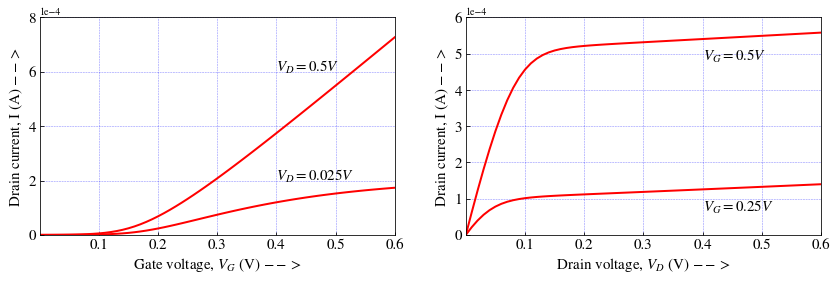

In [4]:
rcParams.update({'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

figure(figsize=(14,4))
#figure 1.1.1(a)
subplot(1,2,1)
plot(VV,I1,'r',lw=2)
plot(VV,I2,'r',lw=2)
xlabel(' Gate voltage, $V_G$ (V) $-->$ ',fontsize=15)
ylabel(' Drain current, I (A) $-->$ ',fontsize=15)
xlim(0,0.6)
ylim(0,8e-4)
ticklabel_format(style='sci', axis='y', scilimits=(0,0))
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.1,0.7,0.1),fontsize=15)
text(0.4,6e-4,r'$V_D=0.5V$',fontsize=15)
text(0.4,2e-4,r'$V_D=0.025V$',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

#figure 1.1.1(b)
subplot(1,2,2)
plot(VV,I3,'r',lw=2)
plot(VV,I4,'r',lw=2)
xlabel(' Drain voltage, $V_D$ (V) $-->$ ',fontsize=15)
ylabel(' Drain current, I (A) $-->$ ',fontsize=15)
xlim(0,0.6)
ylim(0,6e-4)
ticklabel_format(style='sci', axis='y', scilimits=(0,0))
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.1,0.7,0.1),fontsize=15)
text(0.4,4.8e-4,'$V_G=0.5V$',fontsize=15)
text(0.4,0.65e-4,'$V_G=0.25V$',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)